Found 7178 images belonging to 7 classes.


C:\Users\ugur-\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step


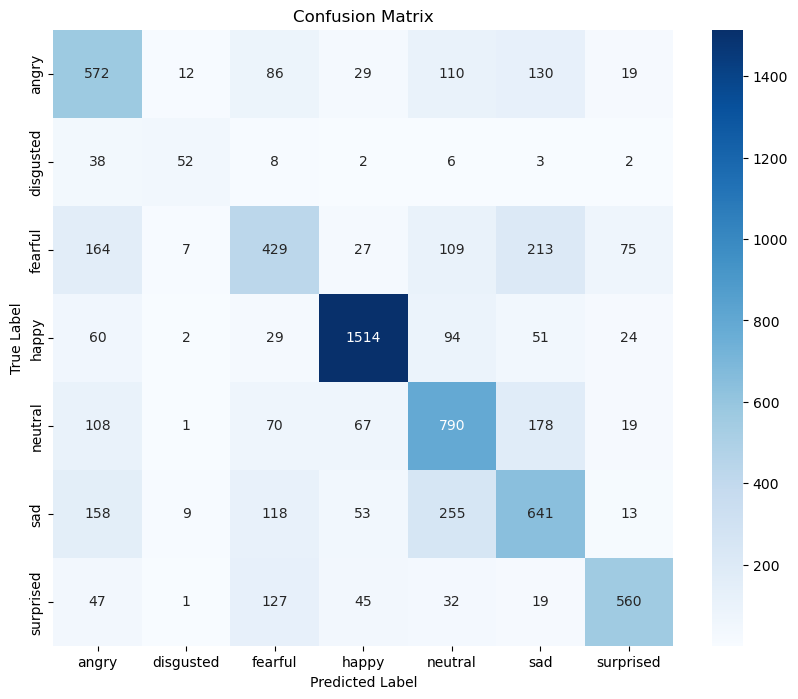

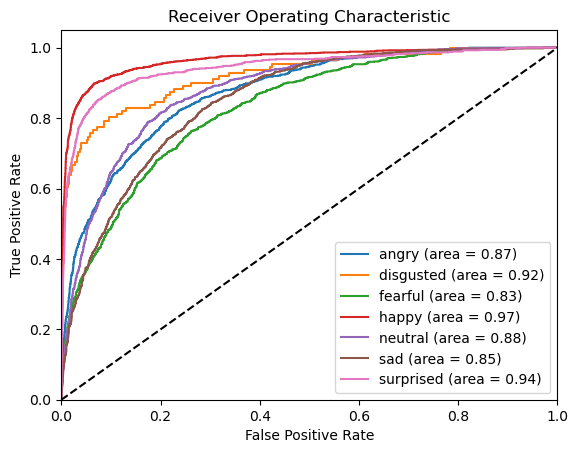

Accuracy: 0.63
Precision: 0.62
Recall: 0.60
F1 Score: 0.61


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Test veri setini yükleme ve ön işleme
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "C:/Users/ugur-/Desktop/FinalDatas/test",  # Test veri setinin yolu
    target_size=(48, 48),
    color_mode='rgb',  # Gri tonlama yerine RGB
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Modeli yükleme
model = load_model("C:/Users/ugur-/Desktop/MODELLER SON/ResNET.h5")

# Tahminler
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Sınıfların isimleri
class_names = list(test_generator.class_indices.keys())

# Metrik hesaplamaları
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Binarize y_true and y_pred for multi-class ROC AUC calculation
y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))
y_pred_bin = label_binarize(y_pred, classes=np.arange(len(class_names)))

# ROC AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Grafikler
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.figure()
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Sonuçların yazdırılması
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
